Capping
Wincerization method

# Percentile Method

In [1]:
import requests
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv"
#headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
#req = requests.get(url, headers=headers)
#data = StringIO(req.text)

#df = pd.read_csv(data)
#df.head()

In [3]:
#df.to_csv('/home/saad/Downloads/weight-height.csv', index=False)

In [4]:
df = pd.read_csv('dataset/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

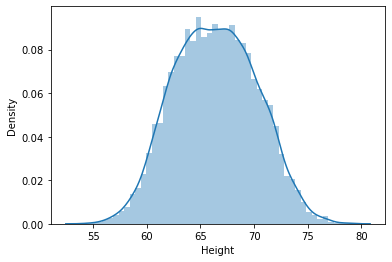

In [7]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

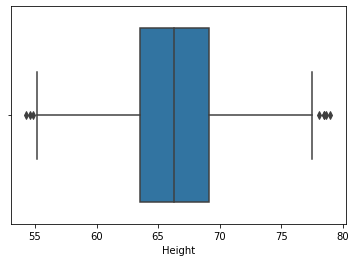

In [8]:
sns.boxplot(df['Height'])

In [9]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [10]:
print(upper_limit)
print(lower_limit)

74.7857900583366
58.13441158671655


In [11]:
# make sure that how much you drop from upper limit same and equal you should drop from lower limit

In [12]:
df[(df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)] # these are outliers

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [13]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)] # without outliers
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Height', ylabel='Density'>

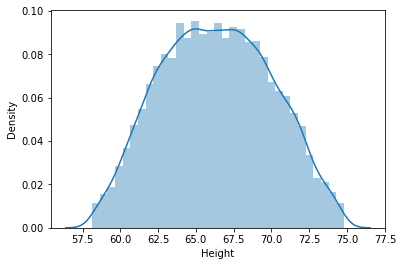

In [14]:
sns.distplot(new_df['Height'])

<AxesSubplot:xlabel='Height'>

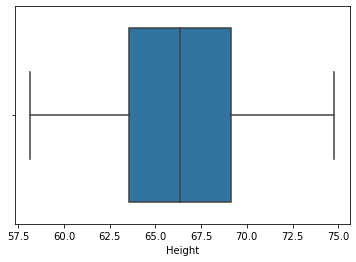

In [15]:
sns.boxplot(new_df['Height'])

In [16]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [17]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

# Capping -> Wincorization

In [18]:
df2 = df.copy()

In [19]:
upper_limit = df2['Height'].quantile(0.99)
lower_limit = df2['Height'].quantile(0.01)

In [20]:
df2['Height']=new_df2 = np.where(
    df2['Height'] >= upper_limit,
    upper_limit,
    np.where(df2['Height'] <= lower_limit,
            lower_limit,
            df2['Height'])
)

<AxesSubplot:xlabel='Height', ylabel='Density'>

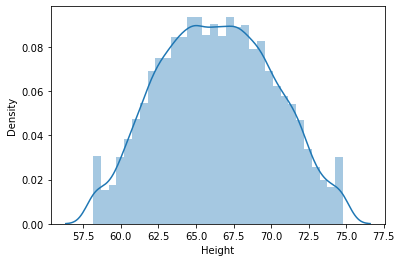

In [21]:
sns.distplot(df2['Height'])

<AxesSubplot:xlabel='Height'>

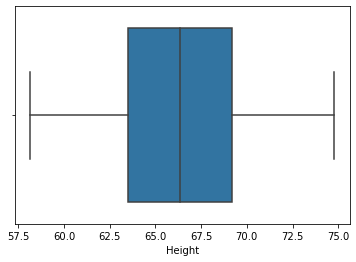

In [22]:
sns.boxplot(df2['Height'])

In [23]:
df2['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [24]:
df.shape

(10000, 3)

In [25]:
import scipy

In [26]:
# scipy.stats.mstats.winsorize()

# Practice

In [27]:
df = pd.read_csv('/home/saad/Downloads/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='size', ylabel='Density'>

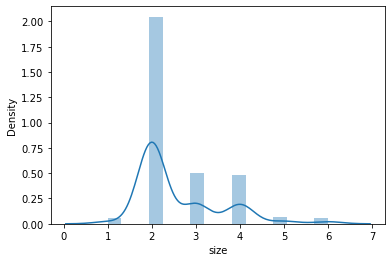

In [28]:
sns.distplot(df['size'])

<AxesSubplot:xlabel='size'>

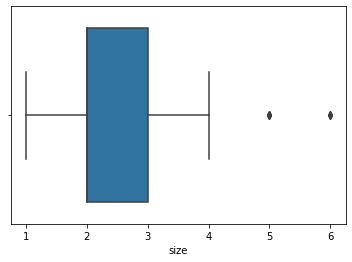

In [29]:
sns.boxplot(df['size'])

In [30]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [31]:
df2 = df.copy()
upper_limit = df2['size'].quantile(0.96)
lower_limit = df2['size'].quantile(0.01)

In [32]:
df2['size'] = np.where(
df2['size'] >= upper_limit,
upper_limit,
np.where(df['size'] <= lower_limit,
        lower_limit,
        df['size']))

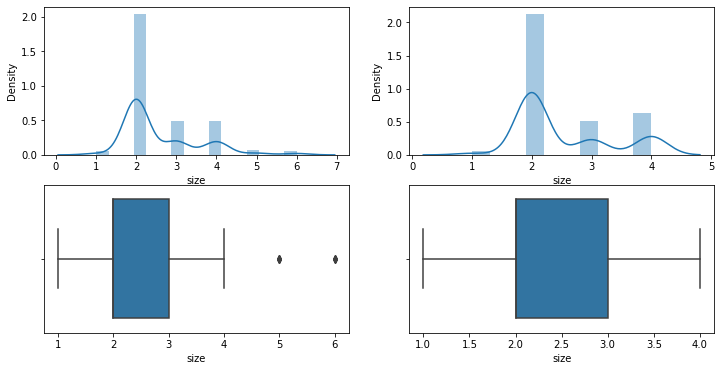

In [33]:
# comparing
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.distplot(df['size'], ax=ax1)
sns.distplot(df2['size'], ax=ax2)

sns.boxplot(df['size'], ax=ax3)
sns.boxplot(df2['size'], ax=ax4)
plt.show()

<AxesSubplot:xlabel='size'>

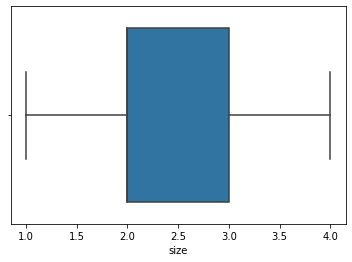

In [34]:
sns.boxplot(df2['size'])

In [35]:
df2['size'].describe()

count    244.000000
mean       2.516393
std        0.813807
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: size, dtype: float64

In [36]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64